# 準備

In [3]:
import numpy as np
import pandas as pd
import pandas.tools.plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pylab
import matplotlib.gridspec
import japanize_matplotlib
import math
import seaborn
import sys
import scipy
import IPython
import warnings
import collections
import random
import time
import optuna
import sklearn
import sklearn.preprocessing
from sklearn.ensemble import RandomForestRegressor
import sklearn.discriminant_analysis 
import sklearn.preprocessing
import sklearn.manifold
import sklearn.linear_model
import sklearn.neighbors
import sklearn.utils
import sklearn.tree 
import sklearn.neural_network
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,log_loss
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.externals import joblib
import chainer
import chainer.training 
import xgboost
import lightgbm

In [10]:
!import sys
sys.path

/bin/sh: import: command not found


['/Users/tomohiromunemasa/.pyenv/versions/anaconda3-4.3.1/lib/python36.zip',
 '/Users/tomohiromunemasa/.pyenv/versions/anaconda3-4.3.1/lib/python3.6',
 '/Users/tomohiromunemasa/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/lib-dynload',
 '',
 '/Users/tomohiromunemasa/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages',
 '/Users/tomohiromunemasa/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/aeosa',
 '/Users/tomohiromunemasa/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/IPython/extensions',
 '/Users/tomohiromunemasa/.ipython']

In [55]:
warnings.filterwarnings('ignore')

In [56]:
train = pd.read_csv("../data/raw/train.csv")
test = pd.read_csv("../data/raw/test.csv")

## データをシャッフル

In [57]:
train = train.sample(frac=1, random_state=0)
test = test.sample(frac=1, random_state=0)

## インデックス振り直し

In [58]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

## idラベル削除

In [59]:
train = train.drop('id', axis=1)

In [60]:
test = test.drop('id', axis=1)

In [61]:
train.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,0,0,0,0,0,0,0,1,14,0,...,0,0,0,1,0,0,0,0,0,Class_2
1,0,1,1,8,0,0,0,0,0,1,...,0,0,0,0,2,0,0,0,0,Class_6
2,0,2,9,4,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Class_6
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,Class_6
4,1,0,0,0,1,0,0,2,0,0,...,0,0,0,0,0,0,5,1,0,Class_6


In [62]:
test.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,0,0,0,6,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,2,0,0
2,1,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,1,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,1,0,...,0,0,2,0,4,0,1,0,2,0


In [63]:
X_train = train.iloc[:,0:93]

In [64]:
Y_train = train.iloc[:,93]

In [154]:
x_test.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
43314,0,0,3,2,0,0,0,2,0,0,...,0,0,0,0,0,1,1,0,1,0
43315,0,0,0,0,0,0,0,0,0,0,...,0,0,12,0,7,0,0,0,0,0
43316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
43317,0,0,0,0,0,0,0,0,13,0,...,0,0,0,0,0,0,0,0,0,0
43318,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,2,0,0,0,1,1


## テストデータラベル振り直し

In [159]:
x_test.reset_index(drop=True, inplace=True), y_test.reset_index(drop=True, inplace=True)

(None, None)

In [161]:
x_test.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,0,0,3,2,0,0,0,2,0,0,...,0,0,0,0,0,1,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,12,0,7,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,0,0,0,0,0,0,13,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,2,0,0,0,1,1


## トレインデータ・テストデータ分割

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=3,shuffle=False)

In [152]:
x_train.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,0,0,0,0,0,0,0,1,14,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,1,8,0,0,0,0,0,1,...,0,0,0,0,0,2,0,0,0,0
2,0,2,9,4,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
4,1,0,0,0,1,0,0,2,0,0,...,0,0,0,0,0,0,0,5,1,0


## 欠損値なし

In [40]:
train.isnull().any().any()

False

In [41]:
test.isnull().any().any()

False

## ロジスティック回帰

### 訓練データで学習

In [71]:
model_lf = sklearn.linear_model.LogisticRegression(random_state=3)

In [72]:
model_lf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=3, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
np.average(sklearn.cross_validation.cross_val_score(model_lf,x_train,y_train, cv=5, scoring="neg_log_loss"))

-0.6744232596645212

### テストデータで評価

In [103]:
predict=model_lf.predict(x_test)
print("accuracy : "+str(accuracy_score(y_test,predict)))
print("log_loss : "+str(log_loss(y_test,model_lf.predict_proba(x_test))))

accuracy : 0.7552790346907994
log_loss : 0.6750955091823778


## ランダムフォレスト 

In [81]:
model_rf = sklearn.ensemble.RandomForestClassifier(n_estimators=100,min_samples_leaf=3, random_state=0)
model_rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### グリッドサーチ 

In [88]:
params = {
    'max_depth': list(range(1, 15)),
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy'],
}
grid_search = GridSearchCV(model_rf,  # 分類器を渡す
                            param_grid=params,  # 試行してほしいパラメータを渡す
                            cv=10,  # 10-Fold CV で汎化性能を調べる
                           scoring="accuracy"
                        )

# グリッドサーチで優れたハイパーパラメータを探す
grid_search.fit(x_train, y_train)
    
print(grid_search.best_params_)  

{'criterion': 'entropy', 'max_depth': 14, 'n_estimators': 100}


In [89]:
print(grid_search.best_score_)

0.7503578519647227


In [92]:
model_rf = sklearn.ensemble.RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=14, random_state=3)
model_rf.fit(x_train,y_train)
np.average(sklearn.cross_validation.cross_val_score(model_rf,x_train,y_train, cv=5, scoring="neg_log_loss"))

-0.7778552493175653

In [102]:
predict=model_rf.predict(x_test)
print("accuracy : "+str(accuracy_score(y_test,predict)))
print("log_loss : "+str(log_loss(y_test,model_rf.predict_proba(x_test))))

accuracy : 0.7530165912518854
log_loss : 0.7691067036783431


### Optuna

In [23]:
def objective(trial):
    # hypyer param
    max_depth = trial.suggest_int('max_depth', 3, 10) # 深すぎると過学習になるかも...
    n_estimators = trial.suggest_int('n_estimators', 50, 100) # しっかりやるなら100以上
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'auto', 'log2'])
    min_samples_split = trial.suggest_int("min_samples_split", 8, 16)
    max_leaf_nodes = int(trial.suggest_discrete_uniform("max_leaf_nodes", 4, 64, 4))
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
 
    # model
    model = sklearn.ensemble.RandomForestClassifier(max_depth=max_depth,
                                  n_estimators=n_estimators,
                                  max_features=max_features,
                                  min_samples_split=min_samples_split,
                                  max_leaf_nodes=max_leaf_nodes,
                                  criterion=criterion,
                                  n_jobs=-1,
                                  verbose=1)
 
    # fit
    model.fit(X_train_mini, Y_train_mini)
 
    # eval
    score = -1 * model.score(X_train_mini, Y_train_mini) 
    return score

In [31]:
study = optuna.create_study()
study.optimize(func=objective, # 実行する関数
               n_trials=100, # 試行回数
               timeout=None, # 与えられた秒数後に学習を中止します。default=None
               n_jobs=-1 # 並列実行するjob数
              )

[W 2019-01-29 00:49:15,397] Setting trial status as TrialState.FAIL because of the following error: IndexError('pop from empty list',)
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/optuna/study.py", line 400, in _run_trial
    result = func(trial)
  File "<ipython-input-23-6c6ee153e631>", line 21, in objective
    model.fit(X_train_mini, Y_train_mini)
  File "/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py", line 316, in fit
    random_state=random_state)
  File "/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/base.py", line 130, in _make_estimator
    _set_random_states(estimator, random_state)
  File "/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/base.py", line 57, in _set_random_states
    estimator.set_params(**to_set)
  File "/anaconda3/lib/python3.6/site-packages/sklearn/base.py", line 265, in set_params
    valid_params = self.get_params(deep=True)
  File "/anaconda3/lib/python3.6/site-packages/sklearn/base.

[Parallel(n_jobs=4)]: Done  85 out of  85 | elapsed:    0.0s finished
[I 2019-01-29 00:49:17,809] Finished a trial resulted in value: -0.711. Current best value is -0.767 with parameters: {'max_depth': 8, 'n_estimators': 51, 'max_features': 'auto', 'min_samples_split': 8, 'max_leaf_nodes': 40.0, 'criterion': 'gini'}.
[W 2019-01-29 00:49:18,492] Setting trial status as TrialState.FAIL because of the following error: IndexError('pop from empty list',)
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/optuna/study.py", line 400, in _run_trial
    result = func(trial)
  File "<ipython-input-23-6c6ee153e631>", line 21, in objective
    model.fit(X_train_mini, Y_train_mini)
  File "/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py", line 316, in fit
    random_state=random_state)
  File "/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/base.py", line 125, in _make_estimator
    estimator = clone(self.base_estimator_)
  File "/anaconda3/l

[Parallel(n_jobs=4)]: Done  91 out of  91 | elapsed:    0.1s finished
[I 2019-01-29 00:49:25,150] Finished a trial resulted in value: -0.738. Current best value is -0.786 with parameters: {'max_depth': 8, 'n_estimators': 79, 'max_features': 'auto', 'min_samples_split': 8, 'max_leaf_nodes': 48.0, 'criterion': 'gini'}.
[I 2019-01-29 00:49:25,234] Finished a trial resulted in value: -0.799. Current best value is -0.799 with parameters: {'max_depth': 10, 'n_estimators': 92, 'max_features': 'auto', 'min_samples_split': 10, 'max_leaf_nodes': 48.0, 'criterion': 'gini'}.
[I 2019-01-29 00:49:25,241] Finished a trial resulted in value: -0.739. Current best value is -0.799 with parameters: {'max_depth': 10, 'n_estimators': 92, 'max_features': 'auto', 'min_samples_split': 10, 'max_leaf_nodes': 48.0, 'criterion': 'gini'}.
[I 2019-01-29 00:49:25,245] Finished a trial resulted in value: -0.741. Current best value is -0.799 with parameters: {'max_depth': 10, 'n_estimators': 92, 'max_features': 'auto',

IndexError: pop from empty list
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  76 out of  76 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.1s finished
[I 2019-01-29 00:49:31,894] Finished a trial resulted in value: -0.677. Current best value is -0.801 with parameters: {'max_depth': 10, 'n_estimators': 83, 'max_features': 'log2', 'min_samples_split': 11, 'max_leaf_nodes': 60.0, 'criterion': 'entropy'}.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  58 out of  58 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    0.0s finished
[I 2019-01-29 00:49:32,042] Finished a trial resulted i

IndexError: pop from empty list
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  85 out of  85 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[I 2019-01-29 00:49:36,174][Parallel(n_jobs=4)]: Done  82 out of  82 | elapsed:    0.1s finished
 Finished a trial resulted in value: -0.794. Current best value is -0.801 with parameters: {'max_depth': 10, 'n_estimators': 83, 'max_features': 'log2', 'min_samples_split': 11, 'max_leaf_nodes': 60.0, 'criterion': 'ent

[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  81 out of  81 | elapsed:    0.0s finished
[I 2019-01-29 00:49:39,020] Finished a trial resulted in value: -0.786. Current best value is -0.805 with parameters: {'max_depth': 10, 'n_estimators': 86, 'max_features': 'auto', 'min_samples_split': 13, 'max_leaf_nodes': 52.0, 'criterion': 'gini'}.
[I 2019-01-29 00:49:39,030] Finished a trial resulted in value: -0.799. Current best value is -0.805 with parameters: {'max_depth': 10, 'n_estimators': 86, 'max_features': 'auto', 'min_samples_split': 13, 'max_leaf_nodes': 52.0, 'criterion': 'gini'}.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  42 tasks    

In [32]:
#最適化したハイパーパラメータの確認
print('check!!!')
print('best_param:{}'.format(study.best_params))
print('====================')
 
#最適化後の目的関数値
print('best_value:{}'.format(study.best_value))
print('====================')
 
#最適な試行
print('best_trial:{}'.format(study.best_trial))
print('====================')
 
# トライアルごとの結果を確認
for i in study.trials:
    print('param:{0}, eval_value:{1}'.format(i[5], i[2]))
print('====================')

check!!!
best_param:{'max_depth': 10, 'n_estimators': 86, 'max_features': 'auto', 'min_samples_split': 13, 'max_leaf_nodes': 52.0, 'criterion': 'gini'}
best_value:-0.805
best_trial:FrozenTrial(trial_id=84, state=<TrialState.COMPLETE: 1>, value=-0.805, datetime_start=datetime.datetime(2019, 1, 29, 0, 49, 35, 406908), datetime_complete=datetime.datetime(2019, 1, 29, 0, 49, 36, 234130), params={'max_depth': 10, 'n_estimators': 86, 'max_features': 'auto', 'min_samples_split': 13, 'max_leaf_nodes': 52.0, 'criterion': 'gini'}, user_attrs={}, system_attrs={}, intermediate_values={}, params_in_internal_repr={'max_depth': 10, 'n_estimators': 86, 'max_features': 1, 'min_samples_split': 13, 'max_leaf_nodes': 52.0, 'criterion': 0})
param:{'max_depth': 8, 'n_estimators': 67, 'max_features': 'log2', 'min_samples_split': 13, 'max_leaf_nodes': 36.0, 'criterion': 'gini'}, eval_value:None
param:{'max_depth': 8, 'n_estimators': 51, 'max_features': 'auto', 'min_samples_split': 8, 'max_leaf_nodes': 40.0, '

param:{'max_depth': 9, 'n_estimators': 81, 'max_features': 'sqrt', 'min_samples_split': 14, 'max_leaf_nodes': 64.0, 'criterion': 'gini'}, eval_value:-0.794


In [38]:
model_rf = sklearn.ensemble.RandomForestClassifier(n_estimators=86,max_features='auto',min_samples_split=13,criterion='gini',max_depth=10,max_leaf_nodes=52, random_state=0)
model_rf.fit(X_train,Y_train)
np.average(sklearn.cross_validation.cross_val_score(model_rf,X_train,Y_train, cv=5, scoring="neg_log_loss"))

0.6878215291581783

## SVM

In [169]:
model_svc = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
model_svc.fit(x_train, y_train)

NameError: name 'OneVsRestClassifier' is not defined

## ロジスティック+ランダムフォレスト

### RFの予測確率をデータに追加

In [121]:
rf_proba=model_rf.predict_proba(x_train)
rf_proba = pd.DataFrame(rf_proba)
x_train_plus_rf_proba = pd.concat([x_train, rf_proba], axis=1)

In [122]:
x_train_plus_rf_proba.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_93,0,1,2,3,4,5,6,7,8
0,0,0,0,0,0,0,0,1,14,0,...,0,0.003018,0.483691,0.479294,0.006161,0.004292,0.005378,0.003462,0.007866,0.006838
1,0,1,1,8,0,0,0,0,0,1,...,0,0.016320,0.024958,0.013265,0.004412,0.008580,0.830249,0.023749,0.058992,0.019475
2,0,2,9,4,0,0,0,0,0,0,...,0,0.000014,0.000175,0.000009,0.000014,0.000000,0.989143,0.000070,0.010538,0.000038
3,0,0,0,0,0,0,0,0,0,0,...,0,0.057413,0.166477,0.072367,0.023591,0.031698,0.158603,0.239899,0.157666,0.092287
4,1,0,0,0,1,0,0,2,0,0,...,0,0.031325,0.010093,0.000000,0.000741,0.000172,0.917171,0.015289,0.014126,0.011083


### モデル作成+テストデータで検証

In [163]:
model_lf_rf = sklearn.linear_model.LogisticRegression(random_state=3)
model_lf_rf.fit(x_train_plus_rf_proba,y_train)

rf_proba_test=model_rf.predict_proba(x_test)
rf_proba_test = pd.DataFrame(rf_proba_test)
x_test_plus_rf_proba = pd.concat([x_test, rf_proba_test], axis=1)

predict=model_lf_rf.predict(x_test_plus_rf_proba)
print("accuracy : "+str(accuracy_score(y_test,predict)))
print("log_loss : "+str(log_loss(y_test,model_lf_rf.predict_proba(x_test_plus_rf_proba))))

accuracy : 0.7958414134884723
log_loss : 0.5730613916045375


## Adaboost

In [107]:
model_ada = sklearn.ensemble.AdaBoostClassifier(random_state=0)
model_ada.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=0)

In [108]:
predict=model_ada.predict(x_test)
print("accuracy : "+str(accuracy_score(y_test,predict)))
print("log_loss : "+str(log_loss(y_test,model_ada.predict_proba(x_test))))

accuracy : 0.6995798319327731
log_loss : 2.023936371644611


## Xgboost

In [105]:
model_xgb = xgboost.XGBClassifier(random_state=0)
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [106]:
predict=model_xgb.predict(x_test)
print("accuracy : "+str(accuracy_score(y_test,predict)))
print("log_loss : "+str(log_loss(y_test,model_xgb.predict_proba(x_test))))

accuracy : 0.7738633915104504
log_loss : 0.6555283132387828


## Lightgbm

In [95]:
model_lgbm = lightgbm.LGBMClassifier(random_state=3)
model_lgbm.fit(x_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=3, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [104]:
predict=model_lgbm.predict(x_test)
print("accuracy : "+str(accuracy_score(y_test,predict)))
print("log_loss : "+str(log_loss(y_test,model_lgbm.predict_proba(x_test))))

accuracy : 0.8061301443654385
log_loss : 0.5190501460431314


### 重要度

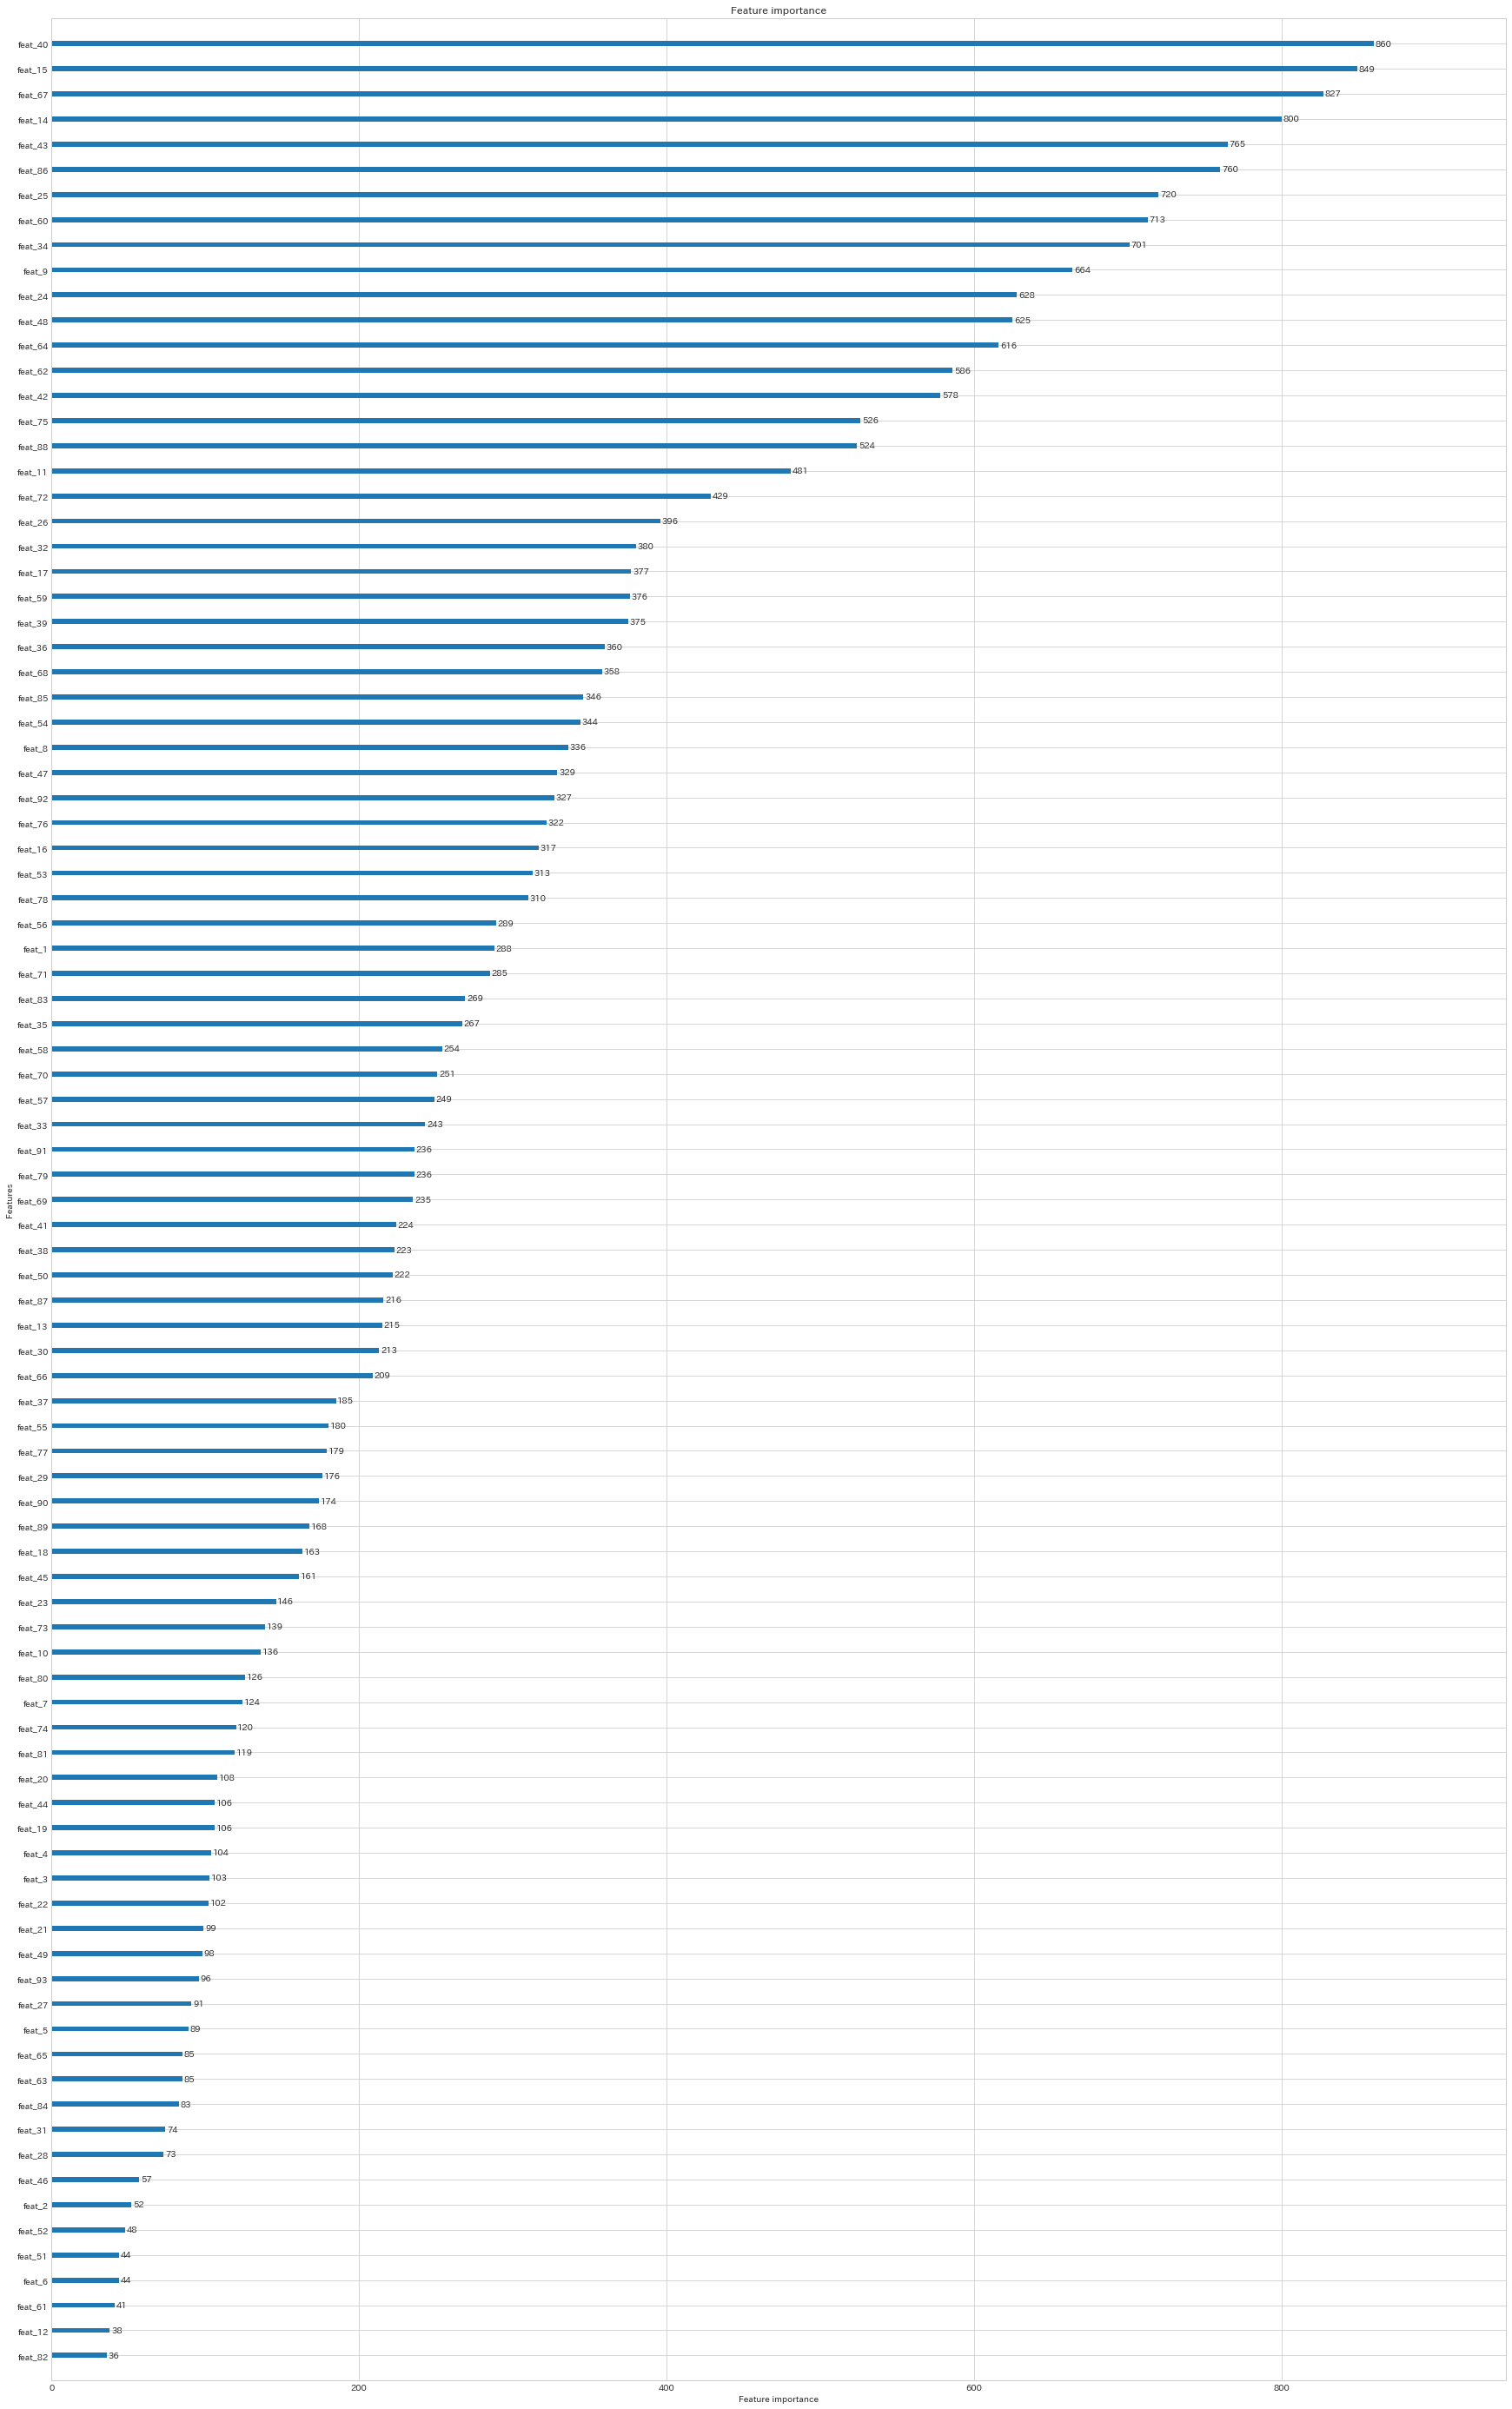

In [109]:
lightgbm.plot_importance(model_lgbm, figsize=(30, 50))